In [393]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [394]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [395]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
data.shape

(907, 27)

In [397]:
# dataset contains 907 rows and  27 columns
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [ ]:
# dataset contains both neumerical and categorical values 
# first we will take primary fuel as target variable its categorical value so its a classification ML problem

In [398]:
# we will check primary fuel value counts
data['primary_fuel'].value_counts()


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [400]:
data['primary_fuel'].unique()


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [401]:
data['primary_fuel'].nunique()


8

In [402]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [328]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [403]:
# sort categorical column
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical column :',categorical_col)
print('\n')
# numerical column
contineous_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        contineous_col.append(i)
print('contineous column :',contineous_col)
print('\n')
        
    
    

categorical column : ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


contineous column : ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']




In [330]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [257]:
contineous_col=contineous_col.drop('other_fuel3',axis=1)

AttributeError: 'list' object has no attribute 'drop'

In [404]:
data.nunique().to_frame('no of unique values')

,no of unique values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
other_fuel2,1


In [332]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 907
other_fuel2                 907
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [333]:
data['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 28.506 , 16.2804, 33.1815, 32.8063,
       23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956, 32.1686,
       24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999, 22.9417,
       25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546, 17.3816,
       20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932, 13.7008,
       13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012, 19.5132,
       21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 , 18.455 ,
       18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172, 24.8263,
       22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145, 21.2083,
        9.9975, 10.0

In [405]:
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())

In [406]:
data['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [407]:
data['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [408]:
data['other_fuel1'].fillna('unknown',inplace=True)


In [410]:
data['other_fuel1'].unique()

array(['unknown', 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [411]:
data['other_fuel2'].fillna('unknown',inplace=True)


In [412]:
data['other_fuel2'].unique()

array(['unknown', 'Oil'], dtype=object)

In [413]:
data=data.drop('other_fuel3',axis=1)

In [414]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [415]:
data=data.drop('commissioning_year',axis=1)

In [416]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [417]:
data['owner'].nunique()

280

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

0      2011.0
1         NaN
2         NaN
3      2004.0
4      2015.0
        ...  
902    2016.0
903       NaN
904       NaN
905       NaN
906       NaN
Name: commissioning_year, Length: 907, dtype: float64

In [418]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,unknown,unknown,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,unknown,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,unknown,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
data['owner'].fillna('unknown',inplace=True)

In [420]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [421]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [422]:
data['geolocation_source'].fillna('unknown',inplace=True)

In [349]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [423]:
df['wepp_id'].value_counts()

Series([], Name: wepp_id, dtype: int64)

In [424]:
df['wepp_id'].unique()

array([nan])

In [425]:
data=data.drop('wepp_id',axis=1)

In [353]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source            0
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [426]:
data['year_of_capacity_data'].nunique()

1

In [427]:
data['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [428]:
data=data.drop('year_of_capacity_data',axis=1)

In [357]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source            0
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [429]:
data=data.drop('generation_gwh_2013',axis=1)

In [430]:
data=data.drop('generation_gwh_2019',axis=1)

In [431]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source            0
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [432]:
data['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,Oil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [433]:
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())

In [434]:
data['generation_gwh_2014']=data['generation_gwh_2014'].replace(0,data['generation_gwh_2014'].mean())

In [435]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source            0
generation_gwh_2014           0
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [436]:
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].replace(0,data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].replace(0,data['generation_gwh_2016'].mean())

data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].replace(0,data['generation_gwh_2017'].mean())

data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())
data['generation_gwh_2018']=data['generation_gwh_2018'].replace(0,data['generation_gwh_2018'].mean())

In [437]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source            0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [438]:
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [439]:
data['generation_data_source'].fillna('unknown',inplace=True)

In [440]:
data['generation_data_source'].unique()

array(['unknown', 'Central Electricity Authority'], dtype=object)

In [441]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
owner                         0
source                        0
url                           0
geolocation_source            0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [442]:
data=data.drop('estimated_generation_gwh',axis=1)

In [443]:
data.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


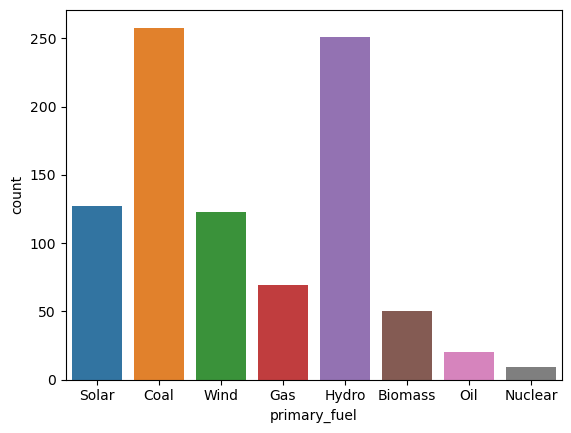

In [444]:
# data visualisation 
ax=sns.countplot(x='primary_fuel',data=data)
print(data['primary_fuel'].value_counts())

IND    907
Name: country, dtype: int64


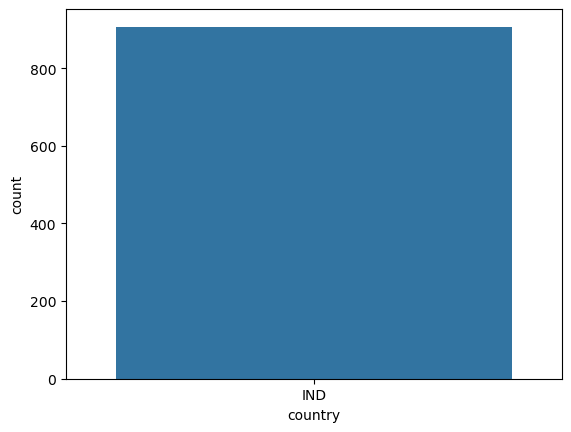

In [247]:
# primaru high count for coal and hydro     ,less count for oil and nuclear 
# we can see class imbalance 
# check country count
ax=sns.countplot(x='country',data=data)
print(data['country'].value_counts())

India    907
Name: country_long, dtype: int64


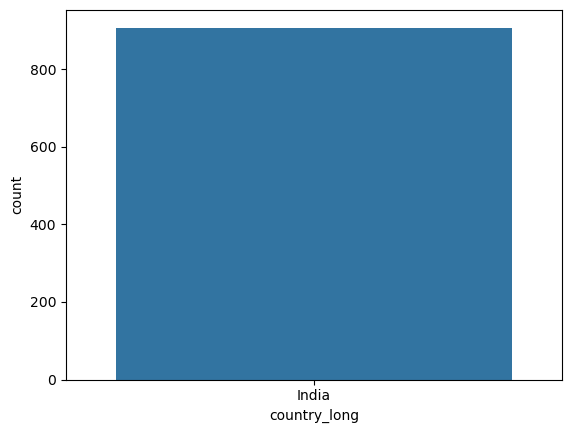

In [248]:
# only one country name so we can drop country column
ax=sns.countplot(x='country_long',data=data)
print(data['country_long'].value_counts())

In [445]:
# we can drop country and country_long 
data=data.drop('country',axis=1)


In [446]:
data=data.drop('country_long',axis=1)

In [447]:
# gppd_idnr is unique no we can delete     
data=data.drop('gppd_idnr',axis=1)

In [448]:
data.isna().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

WRI                                     765
Industry About                          119
unknown                                  19
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


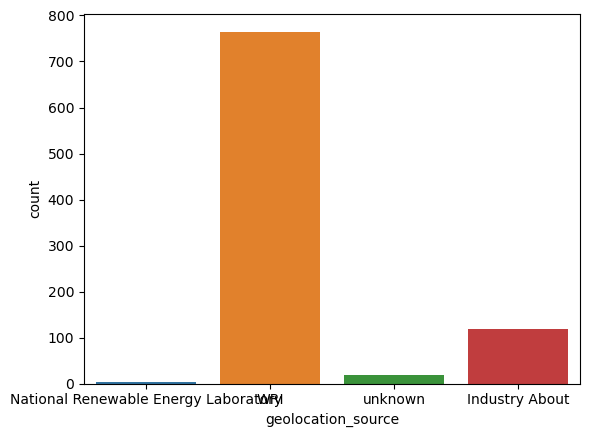

In [376]:
sns.countplot(x='geolocation_source',data=data)
print(data['geolocation_source'].value_counts())

unknown         709
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


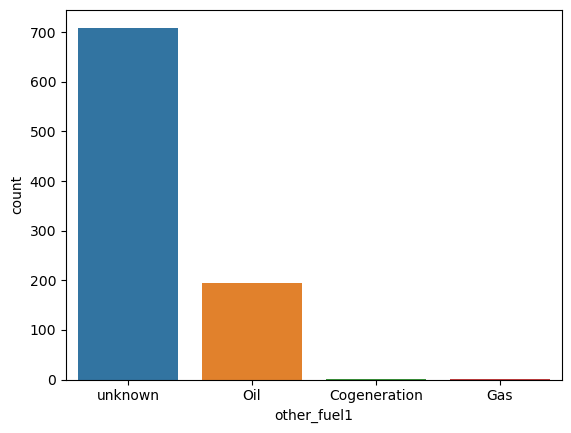

In [253]:
sns.countplot(x='other_fuel1',data=data)
print(data['other_fuel1'].value_counts())

unknown    906
Oil          1
Name: other_fuel2, dtype: int64


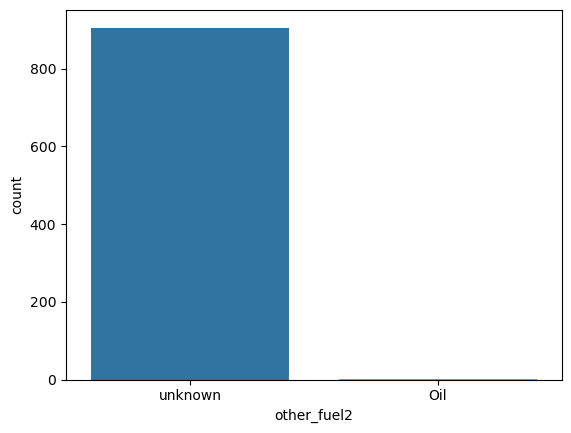

In [254]:
sns.countplot(x='other_fuel2',data=data)
print(data['other_fuel2'].value_counts())

ValueError: could not convert string to float: 'ACME Solar Tower'

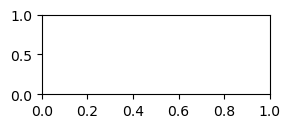

In [258]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=15:
        plt.subplot(5,3,plotnumber)
        sns.distplot(data[col],color='r')
        plt.xlabel(col,fontsize=10)
        plotnumber +=1
plt.tight_layout()

TypeError: list indices must be integers or slices, not str

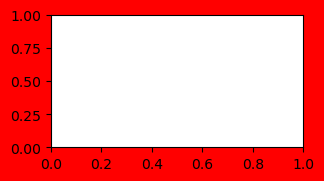

In [261]:
plt.figure(figsize=(15,10),facecolor='red')
plotnumber=1
for col in contineous_col:
    if plotnumber<=20:
        plt.subplot(5,4,plotnumber)
        sns.boxplot(contineous_col[col],palette='winter_r')
        plt.xlabel(col,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [449]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))
data

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,2.5,28.1839,73.2407,6.0,3.0,1.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
1,1.0,98.0,24.7663,74.6090,1.0,3.0,1.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
2,2.0,39.2,21.9038,69.3732,7.0,3.0,1.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
3,3.0,135.0,23.8712,91.3602,2.0,3.0,1.0,280.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,4.0,1800.0,21.9603,82.4091,1.0,2.0,1.0,280.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,1600.0,16.2949,77.3568,1.0,2.0,1.0,280.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0.0
903,903.0,3.0,12.8932,78.1654,6.0,3.0,1.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
904,904.0,25.5,15.2758,75.5811,7.0,3.0,1.0,280.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
905,905.0,80.0,24.3500,73.7477,1.0,3.0,1.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0


In [379]:
data.dtypes

name                      float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
other_fuel1               float64
other_fuel2               float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

In [450]:
data.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,326.223755,21.197918,77.464907,3.206174,2.777288,0.998897,227.476295,43.847850,94.469680,1.754135,2506.896424,2500.511541,2549.566523,2637.647174,2712.635807,0.504961
std,261.972645,590.085456,6.079148,4.812291,2.280652,0.429348,0.033204,83.924045,44.642818,70.381222,0.700183,2629.757090,2827.530635,2841.461051,2880.593843,2980.285867,0.500251
min,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045355,0.118300,0.099500,0.425769,0.056000,0.000000
25%,226.500000,16.725000,17.072000,74.388900,1.000000,3.000000,1.000000,188.500000,22.000000,58.000000,2.000000,1687.488000,1370.462900,1365.502290,1472.802025,1494.179950,0.000000
50%,453.000000,59.200000,21.281800,76.979200,3.000000,3.000000,1.000000,280.000000,22.000000,58.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,679.500000,385.250000,25.176450,79.206100,6.000000,3.000000,1.000000,280.000000,29.500000,115.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,906.000000,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,280.000000,190.000000,303.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


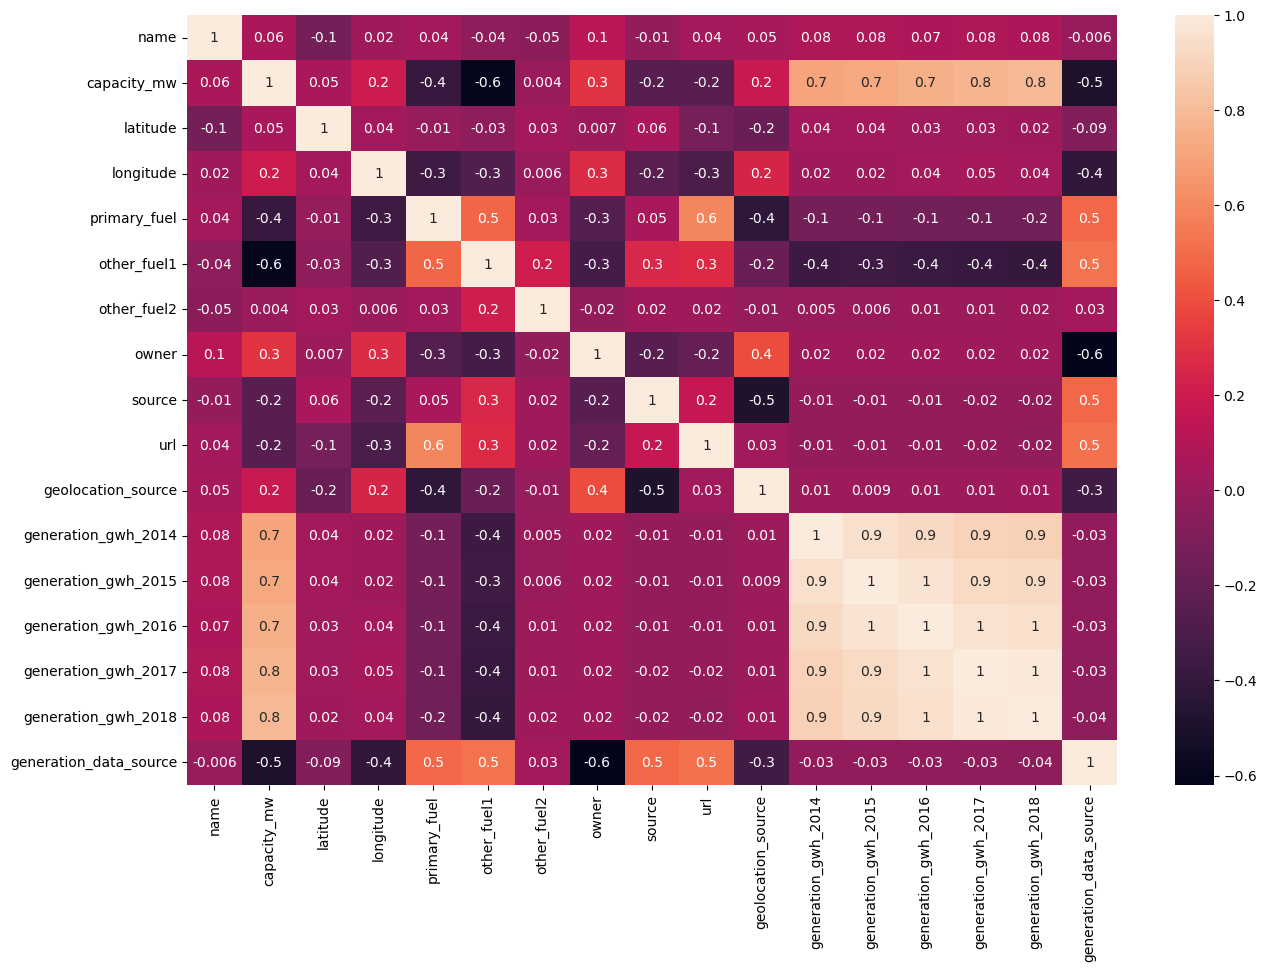

In [451]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.1g')
plt.show()

In [267]:
x=data.drop('primary_fuel',axis=1)
y=data['primary_fuel']

In [268]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [269]:
# lets use vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [270]:
vif

,VIF Values,features
0,1.051905,name
1,6.651454,capacity_mw
2,1.089243,latitude
3,1.282362,longitude
4,1.949548,other_fuel1
5,1.091244,other_fuel2
6,1.879240,owner
7,1.620349,source
8,1.528395,url
9,1.619892,geolocation_source


In [275]:
x=x.drop('generation_gwh_2017',axis=1)

In [276]:
x.head()

,name,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018,generation_data_source
0,-1.730142,-0.548908,1.149805,-0.878280,0.519008,0.033223,0.018166,1.460215,0.476673,-1.077648,-0.028563,-0.025579,-0.028744,-0.037545,0.990126
1,-1.726323,-0.386977,0.587311,-0.593788,0.519008,0.033223,0.363907,2.917019,1.116401,0.351338,-0.028563,-0.025579,-0.028744,-0.037545,0.990126
2,-1.722504,-0.486679,0.116179,-1.682394,0.519008,0.033223,-2.688153,-0.512075,1.571318,0.351338,-0.028563,-0.025579,-0.028744,-0.037545,0.990126
3,-1.718684,-0.324240,0.439989,2.889052,0.519008,0.033223,0.626193,-0.489662,-0.518459,0.351338,-0.718754,-0.586264,-0.585783,-0.700452,-1.009973
4,-1.714865,2.498942,0.125479,1.027976,-1.811388,0.033223,0.626193,-0.489662,-0.518459,0.351338,0.201138,1.208738,1.300553,1.533035,-1.009973


In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [278]:
vif

,VIF Values,features
0,1.051463,name
1,6.637530,capacity_mw
2,1.088171,latitude
3,1.280361,longitude
4,1.949525,other_fuel1
5,1.090987,other_fuel2
6,1.879195,owner
7,1.620349,source
8,1.528284,url
9,1.619887,geolocation_source


In [279]:
x=x.drop('generation_gwh_2016',axis=1)

In [280]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [281]:
vif

,VIF Values,features
0,1.050974,name
1,6.637516,capacity_mw
2,1.088052,latitude
3,1.273920,longitude
4,1.947811,other_fuel1
5,1.090884,other_fuel2
6,1.879193,owner
7,1.620348,source
8,1.528088,url
9,1.619689,geolocation_source


In [282]:
y.value_counts()

1.0    258
3.0    251
6.0    127
7.0    123
2.0     69
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [283]:
# here we can see the data is not balanced hence its classification problem we will balance the data using oversampling method
# oversampling method
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [284]:
y1.value_counts()

6.0    258
1.0    258
7.0    258
2.0    258
3.0    258
0.0    258
5.0    258
4.0    258
Name: primary_fuel, dtype: int64

In [285]:
# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    rfr=RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is ',maxaccu,'at random state ',maxrs)

best accuracy is  0.9782082324455206 at random state  170


In [287]:
# CREATE TRAIN TEST SPLIT
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxrs)


In [288]:
# randomForestclassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_RFC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_RFC))
print("\nclassification report \n\n",classification_report(y_test,pred_RFC))

Accuracy score  0.9175824175824175
confusion matrix 

 [[ 7  3  0  0  0  0  0  0]
 [ 2 54  0  0  0  1  0  0]
 [ 1  0  7  4  0  1  0  0]
 [ 0  0  0 50  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 23]]

classification report 

               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.95      0.95      0.95        57
         2.0       1.00      0.54      0.70        13
         3.0       0.89      0.98      0.93        51
         4.0       0.00      0.00      0.00         0
         5.0       0.50      0.50      0.50         4
         6.0       1.00      1.00      1.00        24
         7.0       1.00      1.00      1.00        23

    accuracy                           0.92       182
   macro avg       0.76      0.71      0.72       182
weighted avg       0.93      0.92      0.92       182



In [289]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_LR))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_LR))
print("\nclassification report \n\n",classification_report(y_test,pred_LR))

Accuracy score  0.8571428571428571
confusion matrix 

 [[ 5  5  0  0  0  0  0  0]
 [ 2 55  0  0  0  0  0  0]
 [ 1  0  1 10  0  0  0  1]
 [ 0  0  2 48  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 23]]

classification report 

               precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        10
         1.0       0.92      0.96      0.94        57
         2.0       0.33      0.08      0.12        13
         3.0       0.79      0.94      0.86        51
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         4
         6.0       1.00      1.00      1.00        24
         7.0       0.96      1.00      0.98        23

    accuracy                           0.86       182
   macro avg       0.57      0.56      0.55       182
weighted avg       0.81      0.86      0.83       182



In [290]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
pred_SVM=SVM.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_SVM))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_SVM))
print("\nclassification report \n\n",classification_report(y_test,pred_SVM))

Accuracy score  0.8736263736263736
confusion matrix 

 [[ 5  5  0  0  0  0  0]
 [ 1 56  0  0  0  0  0]
 [ 1  0  0 11  0  0  1]
 [ 0  0  0 51  0  0  0]
 [ 1  0  0  3  0  0  0]
 [ 0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0 23]]

classification report 

               precision    recall  f1-score   support

         0.0       0.62      0.50      0.56        10
         1.0       0.92      0.98      0.95        57
         2.0       0.00      0.00      0.00        13
         3.0       0.78      1.00      0.88        51
         5.0       0.00      0.00      0.00         4
         6.0       1.00      1.00      1.00        24
         7.0       0.96      1.00      0.98        23

    accuracy                           0.87       182
   macro avg       0.61      0.64      0.62       182
weighted avg       0.79      0.87      0.83       182



In [291]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_GBC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_GBC))
print("\nclassification report \n\n",classification_report(y_test,pred_GBC))

Accuracy score  0.9395604395604396
confusion matrix 

 [[ 8  2  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0]
 [ 1  0  8  3  0  1  0  0]
 [ 0  0  0 50  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  1  0  0  0  0  0 22]]

classification report 

               precision    recall  f1-score   support

         0.0       0.89      0.80      0.84        10
         1.0       0.95      1.00      0.97        57
         2.0       1.00      0.62      0.76        13
         3.0       0.91      0.98      0.94        51
         4.0       0.00      0.00      0.00         0
         5.0       0.67      0.50      0.57         4
         6.0       1.00      1.00      1.00        24
         7.0       1.00      0.96      0.98        23

    accuracy                           0.94       182
   macro avg       0.80      0.73      0.76       182
weighted avg       0.95      0.94      0.94       182



In [292]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ABC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ABC))
print("\nclassification report \n\n",classification_report(y_test,pred_ABC))

Accuracy score  0.6758241758241759
confusion matrix 

 [[ 0  0  0 10  0  0  0]
 [ 0 45  0 12  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0 51  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  0 24  0]
 [ 0  0  0 20  0  0  3]]

classification report 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       1.00      0.79      0.88        57
         2.0       0.00      0.00      0.00        13
         3.0       0.46      1.00      0.63        51
         5.0       0.00      0.00      0.00         4
         6.0       1.00      1.00      1.00        24
         7.0       1.00      0.13      0.23        23

    accuracy                           0.68       182
   macro avg       0.49      0.42      0.39       182
weighted avg       0.70      0.68      0.61       182



In [293]:
from sklearn.ensemble import BaggingClassifier
BAGG=BaggingClassifier()
BAGG.fit(x_train,y_train)
pred_BAGG=BAGG.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_BAGG))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_BAGG))
print("\nclassification report \n\n",classification_report(y_test,pred_BAGG))

Accuracy score  0.9230769230769231
confusion matrix 

 [[ 5  5  0  0  0  0  0  0]
 [ 1 55  0  0  0  1  0  0]
 [ 1  0 10  1  0  1  0  0]
 [ 0  0  0 50  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 1  0  0  0  0  0  0 22]]

classification report 

               precision    recall  f1-score   support

         0.0       0.62      0.50      0.56        10
         1.0       0.92      0.96      0.94        57
         2.0       1.00      0.77      0.87        13
         3.0       0.94      0.98      0.96        51
         4.0       0.00      0.00      0.00         0
         5.0       0.50      0.50      0.50         4
         6.0       1.00      1.00      1.00        24
         7.0       1.00      0.96      0.98        23

    accuracy                           0.92       182
   macro avg       0.75      0.71      0.73       182
weighted avg       0.93      0.92      0.92       182



In [294]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ETC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ETC))
print("\nclassification report \n\n",classification_report(y_test,pred_ETC))

Accuracy score  0.9065934065934066
confusion matrix 

 [[ 7  3  0  0  0  0  0  0]
 [ 2 55  0  0  0  0  0  0]
 [ 1  0  5  6  0  1  0  0]
 [ 0  0  1 49  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 23]]

classification report 

               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.95      0.96      0.96        57
         2.0       0.83      0.38      0.53        13
         3.0       0.86      0.96      0.91        51
         4.0       0.00      0.00      0.00         0
         5.0       0.67      0.50      0.57         4
         6.0       1.00      1.00      1.00        24
         7.0       1.00      1.00      1.00        23

    accuracy                           0.91       182
   macro avg       0.75      0.69      0.71       182
weighted avg       0.91      0.91      0.90       182



In [295]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_DT))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_DT))
print("\nclassification report \n\n",classification_report(y_test,pred_DT))

Accuracy score  0.9175824175824175
confusion matrix 

 [[ 8  2  0  0  0  0  0  0]
 [ 2 51  3  0  0  1  0  0]
 [ 1  0 10  1  0  1  0  0]
 [ 0  0  0 50  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  2  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 1  0  0  0  0  0  0 22]]

classification report 

               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        10
         1.0       0.96      0.89      0.93        57
         2.0       0.71      0.77      0.74        13
         3.0       0.96      0.98      0.97        51
         4.0       0.00      0.00      0.00         0
         5.0       0.50      0.50      0.50         4
         6.0       1.00      1.00      1.00        24
         7.0       1.00      0.96      0.98        23

    accuracy                           0.92       182
   macro avg       0.73      0.74      0.73       182
weighted avg       0.93      0.92      0.92       182



In [296]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_KNN))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_KNN))
print("\nclassification report \n\n",classification_report(y_test,pred_KNN))

Accuracy score  0.8681318681318682
confusion matrix 

 [[ 8  2  0  0  0  0  0]
 [ 5 52  0  0  0  0  0]
 [ 1  0  3  8  0  0  1]
 [ 0  1  2 48  0  0  0]
 [ 1  0  0  3  0  0  0]
 [ 0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0 23]]

classification report 

               precision    recall  f1-score   support

         0.0       0.53      0.80      0.64        10
         1.0       0.95      0.91      0.93        57
         2.0       0.60      0.23      0.33        13
         3.0       0.81      0.94      0.87        51
         5.0       0.00      0.00      0.00         4
         6.0       1.00      1.00      1.00        24
         7.0       0.96      1.00      0.98        23

    accuracy                           0.87       182
   macro avg       0.69      0.70      0.68       182
weighted avg       0.85      0.87      0.85       182



In [297]:
# cross validation score with RandomForest
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print('accuracy score',accuracy_score(y_test,pred_RFC))
print(score)
print(score.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_RFC)-score.mean())

accuracy score 0.9175824175824175
[0.86813187 0.8956044  0.91160221 0.8839779  0.93370166]
0.8986036063384131
The deference between accuracy score and cross validation score : 0.018978811244004468


In [298]:
score1=cross_val_score(LR,x,y)
print('accuracy score',accuracy_score(y_test,pred_LR))
print(score1)
print(score1.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_LR)-score1.mean())

accuracy score 0.8571428571428571
[0.84065934 0.84615385 0.86740331 0.86187845 0.89502762]
0.862224515815676
The deference between accuracy score and cross validation score : -0.005081658672818956


In [299]:
score2=cross_val_score(SVM,x,y)
print('accuracy score',accuracy_score(y_test,pred_SVM))
print(score2)
print(score2.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_SVM)-score2.mean())

accuracy score 0.8736263736263736
[0.84065934 0.85164835 0.84530387 0.85082873 0.8839779 ]
0.8544836379090522
The deference between accuracy score and cross validation score : 0.01914273571732139


In [300]:
score3=cross_val_score(GBC,x,y)
print('accuracy score',accuracy_score(y_test,pred_GBC))
print(score3)
print(score3.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_GBC)-score3.mean())

accuracy score 0.9395604395604396
[0.83516484 0.90659341 0.9281768  0.88950276 0.91712707]
0.8953129743184991
The deference between accuracy score and cross validation score : 0.044247465241940453


In [301]:
score4=cross_val_score(ABC,x,y)
print('accuracy score',accuracy_score(y_test,pred_ABC))
print(score4)
print(score4.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_ABC)-score4.mean())

accuracy score 0.6758241758241759
[0.6043956  0.61538462 0.62983425 0.67955801 0.66850829]
0.6395361544532816
The deference between accuracy score and cross validation score : 0.03628802137089426


In [302]:
score5=cross_val_score(BAGG,x,y)
print('accuracy score',accuracy_score(y_test,pred_BAGG))
print(score5)
print(score5.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_BAGG)-score5.mean())

accuracy score 0.9230769230769231
[0.85164835 0.87912088 0.90055249 0.85635359 0.91712707]
0.8809604759881002
The deference between accuracy score and cross validation score : 0.042116447088822895


In [303]:
score6=cross_val_score(ETC,x,y)
print('accuracy score',accuracy_score(y_test,pred_ETC))
print(score6)
print(score6.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_ETC)-score6.mean())

accuracy score 0.9065934065934066
[0.84615385 0.88461538 0.91160221 0.86740331 0.88950276]
0.8798555036124098
The deference between accuracy score and cross validation score : 0.026737902980996764


In [304]:
score7=cross_val_score(DT,x,y)
print('accuracy score',accuracy_score(y_test,pred_DT))
print(score7)
print(score7.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_DT)-score7.mean())

accuracy score 0.9175824175824175
[0.83516484 0.77472527 0.92265193 0.86740331 0.89502762]
0.8589945965636574
The deference between accuracy score and cross validation score : 0.058587821018760144


In [305]:
score8=cross_val_score(KNN,x,y)
print('accuracy score',accuracy_score(y_test,pred_KNN))
print(score8)
print(score8.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_KNN)-score8.mean())

accuracy score 0.8681318681318682
[0.84615385 0.85164835 0.86187845 0.84530387 0.88950276]
0.8588974561350252
The deference between accuracy score and cross validation score : 0.00923441199684294


In [ ]:
# best performing model is Logistic regression the deference between accuracy score and cross validation score is very less for logistic regression

In [306]:
# hyper parameter tuning for logistic regression 
from sklearn.model_selection import GridSearchCV

In [317]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'solver':['liblinear','saga']}

In [318]:
grid_search=GridSearchCV(LR,param_grid,cv=5,scoring='accuracy')

In [319]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [320]:
grid_search.best_params_

{'C': 100, 'solver': 'liblinear'}

In [321]:
model=LogisticRegression(C=100,solver='liblinear')

In [322]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,pred)*100)

Accuracy score  86.26373626373626


In [381]:
# after hyper parameter tuning getting same score 86.22 

In [ ]:
# 2 regression model ML problem target variable is capacity_mw 

In [453]:
data['capacity_mw'].nunique()

361

In [454]:
x=data.drop('capacity_mw',axis=1)
y=data['capacity_mw']

In [383]:
x['capacity_mw'].nunique()

361

In [455]:
y.unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [456]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [457]:
# lets use vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [458]:
vif

,VIF Values,features
0,1.056141,name
1,1.089391,latitude
2,1.282293,longitude
3,3.869728,primary_fuel
4,2.234116,other_fuel1
5,1.092458,other_fuel2
6,1.987589,owner
7,2.389409,source
8,2.691548,url
9,3.063227,geolocation_source


In [459]:
x=x.drop('generation_gwh_2017',axis=1)

In [460]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [461]:
vif

,VIF Values,features
0,1.055686,name
1,1.088317,latitude
2,1.279923,longitude
3,3.869576,primary_fuel
4,2.233972,other_fuel1
5,1.092055,other_fuel2
6,1.987578,owner
7,2.389381,source
8,2.691275,url
9,3.063168,geolocation_source


In [462]:
x=x.drop('generation_gwh_2016',axis=1)

In [463]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [464]:
vif

,VIF Values,features
0,1.055079,name
1,1.088188,latitude
2,1.272884,longitude
3,3.863684,primary_fuel
4,2.229699,other_fuel1
5,1.091874,other_fuel2
6,1.987443,owner
7,2.388146,source
8,2.690486,url
9,3.062083,geolocation_source


In [465]:
y.value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [466]:
#  multicolinearity  issue resolved 
# model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

In [467]:
# create train test split
maxACC=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc 
        maxRS=i
print('maximum R2 score is ',maxACC,'on random state ',maxRS)

maximum R2 score is  0.9379193084964217 on random state  96


In [468]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxRS)

In [469]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_pred_train=LR.predict(x_train)
print('R2 score ',r2_score(y_test,LR_pred))
print('R2 score on train data',r2_score(y_train,LR_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,LR_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,LR_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2 score  0.9379193084964217
R2 score on train data 0.816706548983601
Mean Squared error  28906.502899249277
Mean Absolute error  111.24462804120265
Root Mean squared error  170.01912509847025


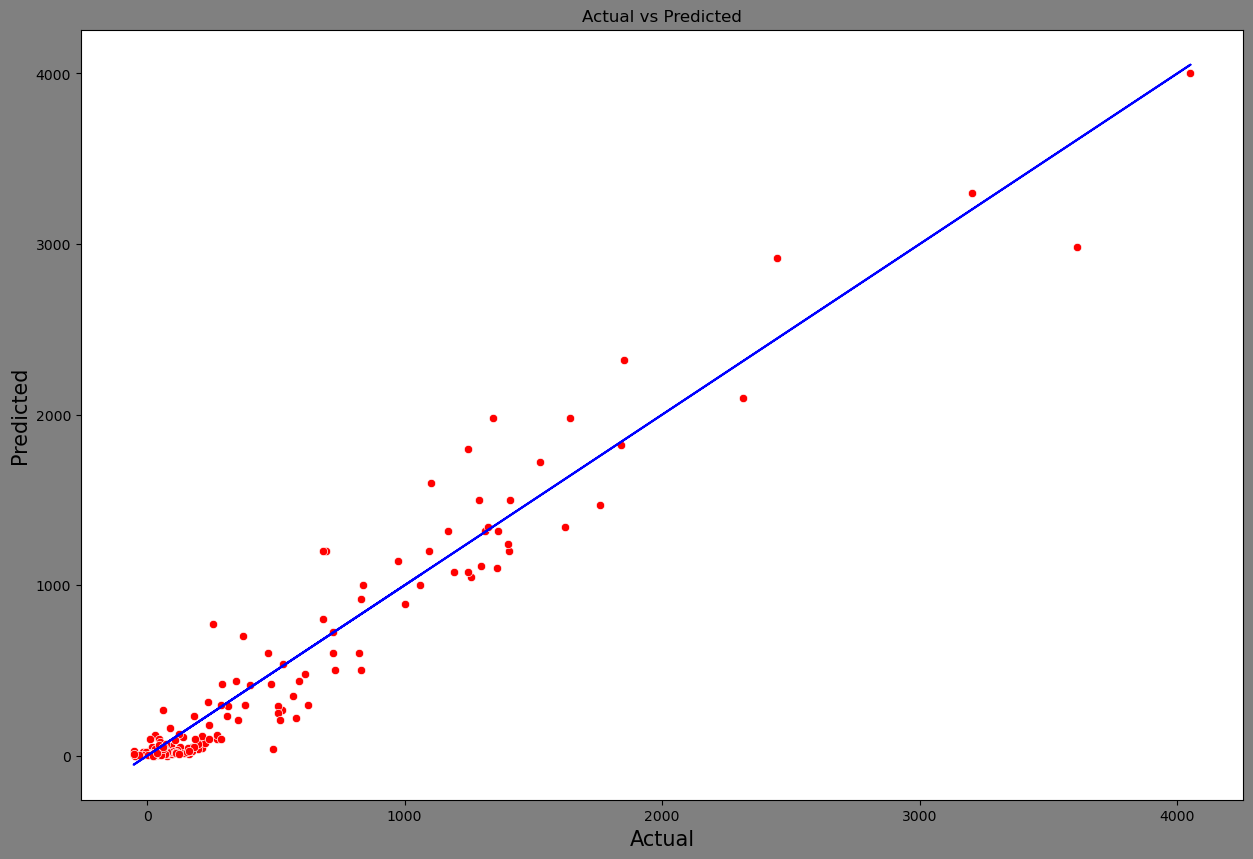

In [470]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='grey')
sns.scatterplot(x=LR_pred,y=y_test,color='r')
plt.plot(LR_pred,LR_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()


In [471]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)
GBR_pred_train=GBR.predict(x_train)
print('R2 score ',r2_score(y_test,GBR_pred))
print('R2 score on train data',r2_score(y_train,GBR_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,GBR_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,GBR_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,GBR_pred)))

R2 score  0.8838322360739729
R2 score on train data 0.95566350504173
Mean Squared error  54090.953618541
Mean Absolute error  122.32647429306051
Root Mean squared error  232.57461946339072


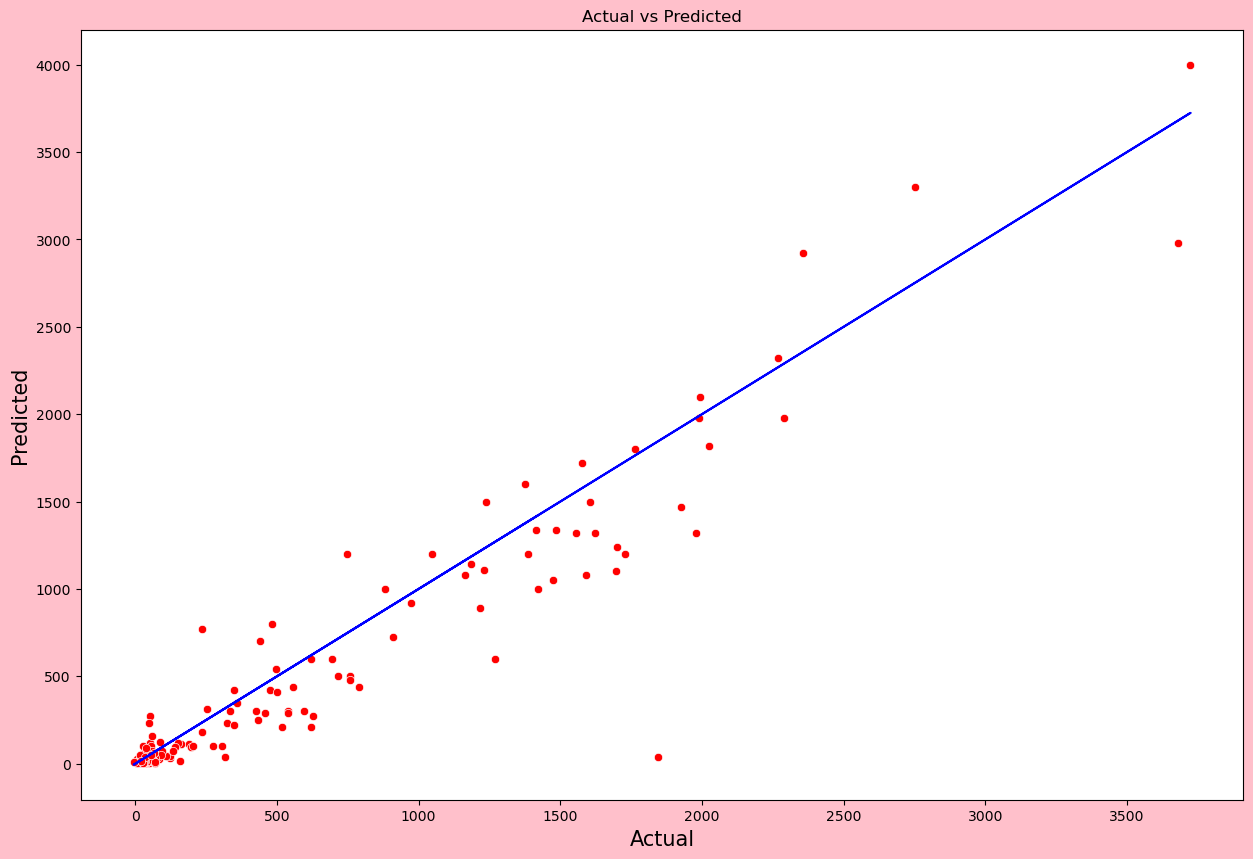

In [472]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='pink')
sns.scatterplot(x=GBR_pred,y=y_test,color='r')
plt.plot(GBR_pred,GBR_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()

In [474]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('R2 score ',r2_score(y_test,DT_pred))
print('R2 score on train data',r2_score(y_train,DT_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,DT_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,DT_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,DT_pred)))

R2 score  0.7777929779093837
R2 score on train data 1.0
Mean Squared error  103465.79222503847
Mean Absolute error  164.05096153846156
Root Mean squared error  321.66098959158614


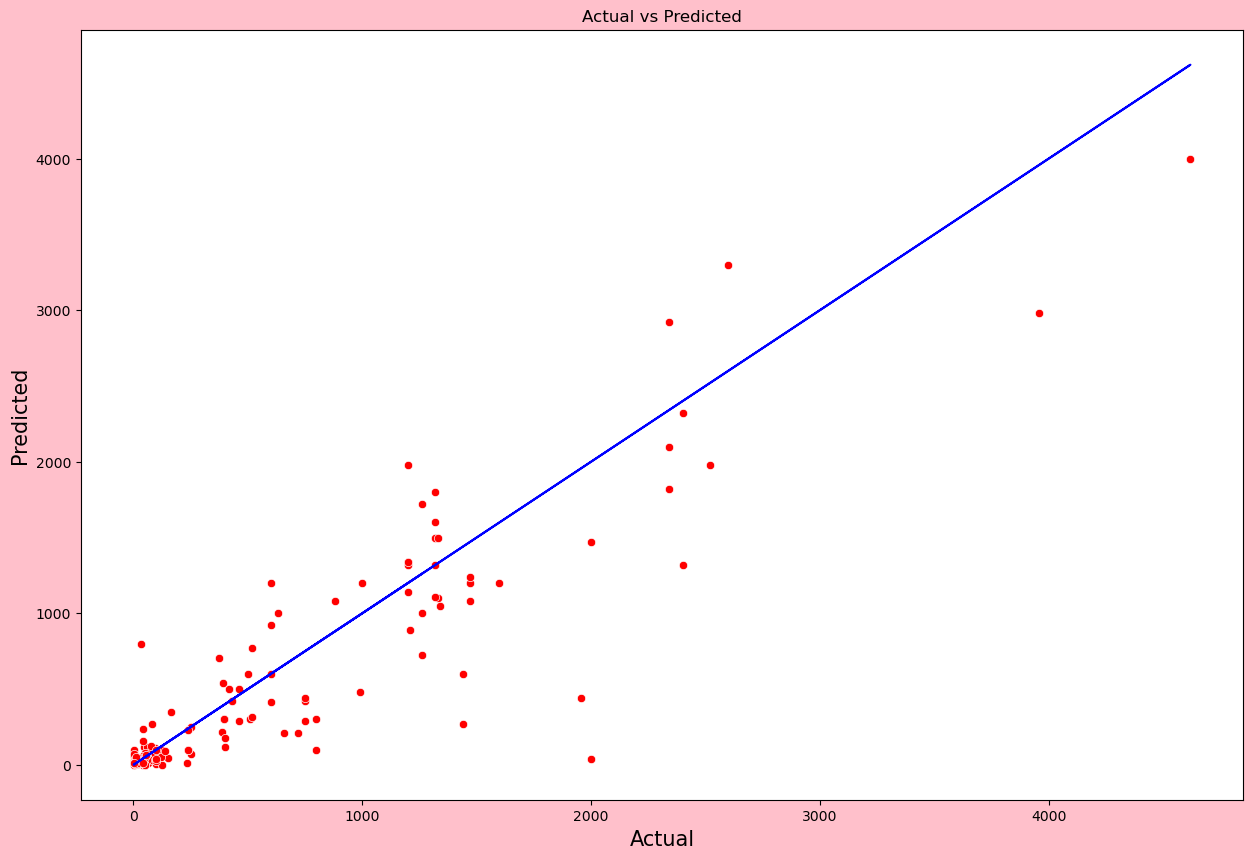

In [475]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='pink')
sns.scatterplot(x=DT_pred,y=y_test,color='r')
plt.plot(DT_pred,DT_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()

In [476]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KNN_pred_train=KNN.predict(x_train)
print('R2 score ',r2_score(y_test,KNN_pred))
print('R2 score on train data',r2_score(y_train,KNN_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,KNN_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,KNN_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,KNN_pred)))

R2 score  0.9151248761822942
R2 score on train data 0.8515665844563577
Mean Squared error  39520.22687391033
Mean Absolute error  110.91107472527473
Root Mean squared error  198.79694885462987


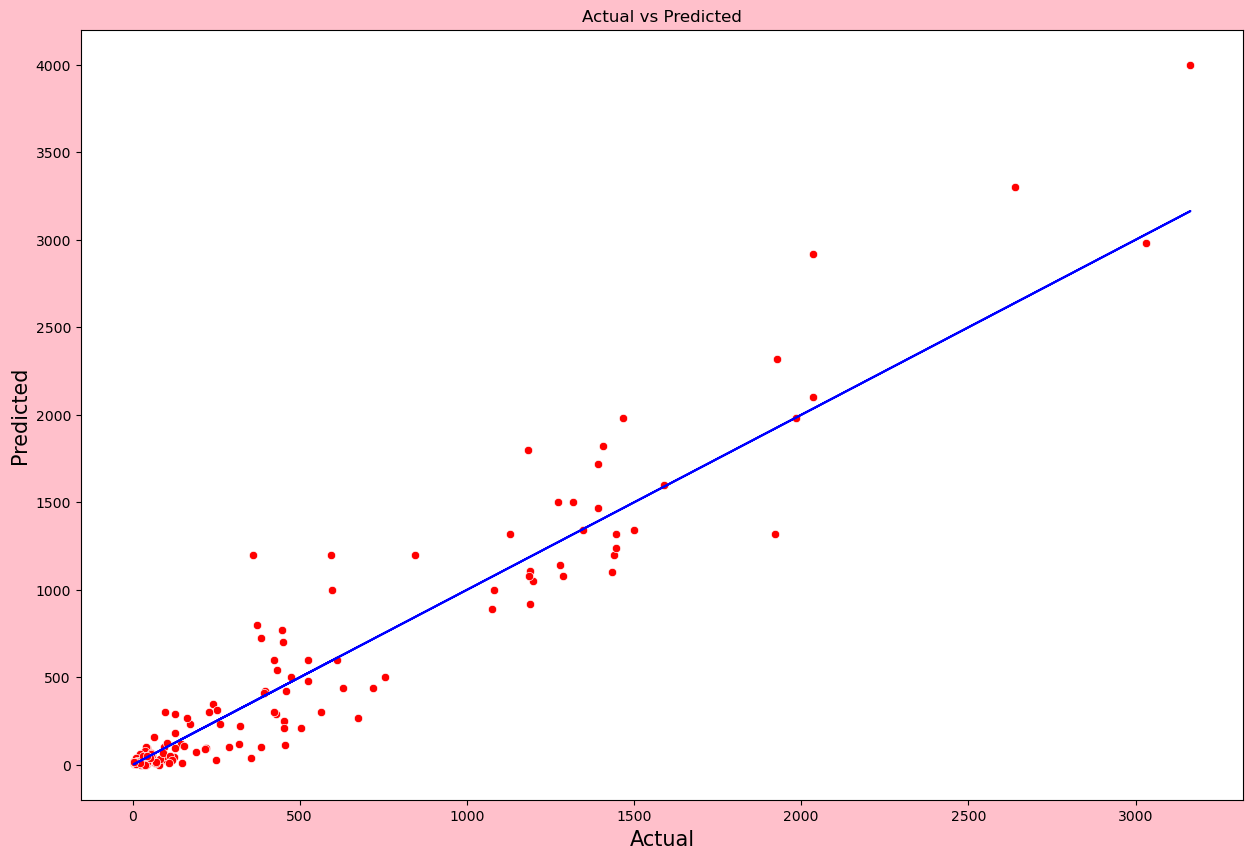

In [477]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='pink')
sns.scatterplot(x=KNN_pred,y=y_test,color='r')
plt.plot(KNN_pred,KNN_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()

In [479]:
from sklearn.linear_model import Ridge ,Lasso
RIDGE=Ridge()
RIDGE.fit(x_train,y_train)
RIDGE_pred=RIDGE.predict(x_test)
RIDGE_pred_train=RIDGE.predict(x_train)
print('R2 score ',r2_score(y_test,RIDGE_pred))
print('R2 score on train data',r2_score(y_train,RIDGE_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,RIDGE_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,RIDGE_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,RIDGE_pred)))

R2 score  0.9376342620522707
R2 score on train data 0.8166954269582964
Mean Squared error  29039.228480500165
Mean Absolute error  111.42187814772258
Root Mean squared error  170.4090035194742


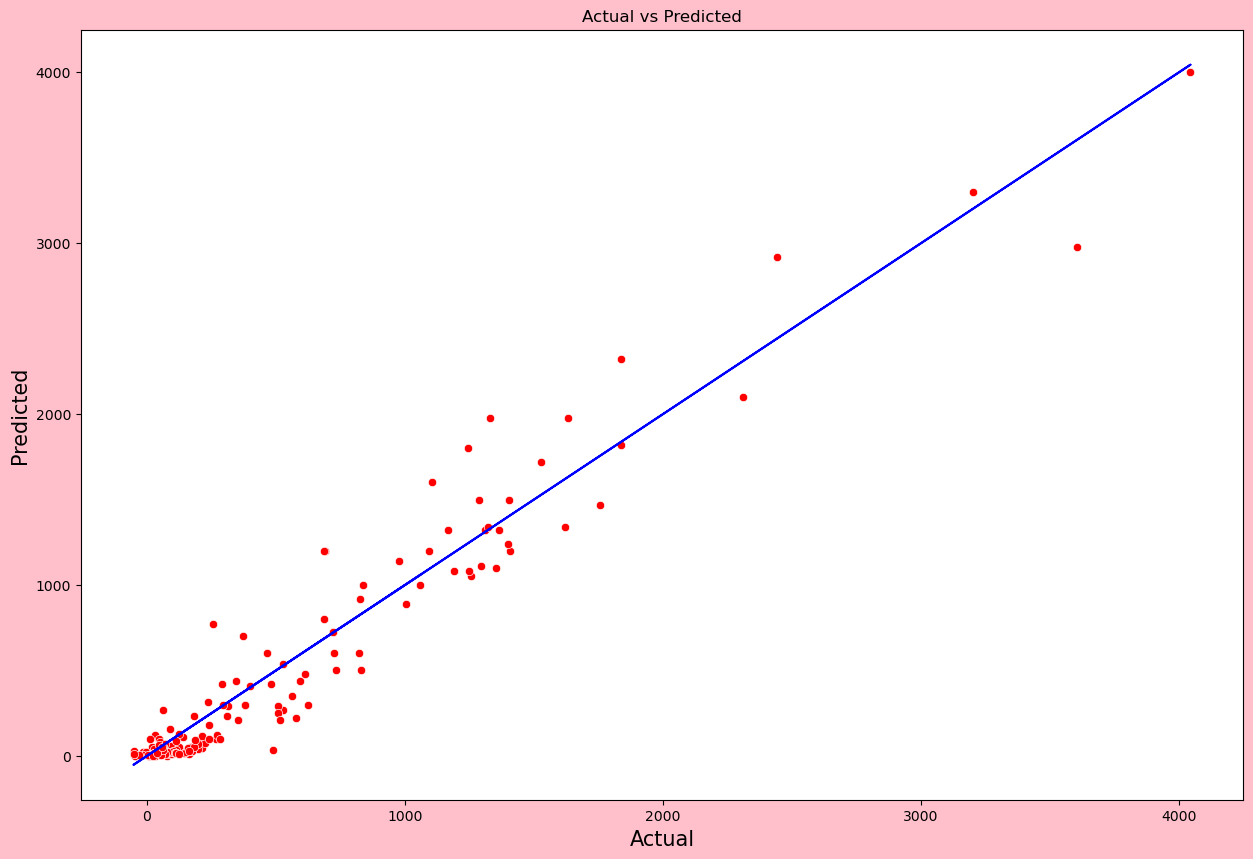

In [480]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='pink')
sns.scatterplot(x=RIDGE_pred,y=y_test,color='r')
plt.plot(RIDGE_pred,RIDGE_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()

In [481]:
LASSO=Lasso()
LASSO.fit(x_train,y_train)
LASSO_pred=LASSO.predict(x_test)
LASSO_pred_train=LASSO.predict(x_train)
print('R2 score ',r2_score(y_test,LASSO_pred))
print('R2 score on train data',r2_score(y_train,LASSO_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,LASSO_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,LASSO_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,LASSO_pred)))

R2 score  0.9381196651783332
R2 score on train data 0.8164183483009047
Mean Squared error  28813.211235347168
Mean Absolute error  110.09149778560335
Root Mean squared error  169.7445469973842


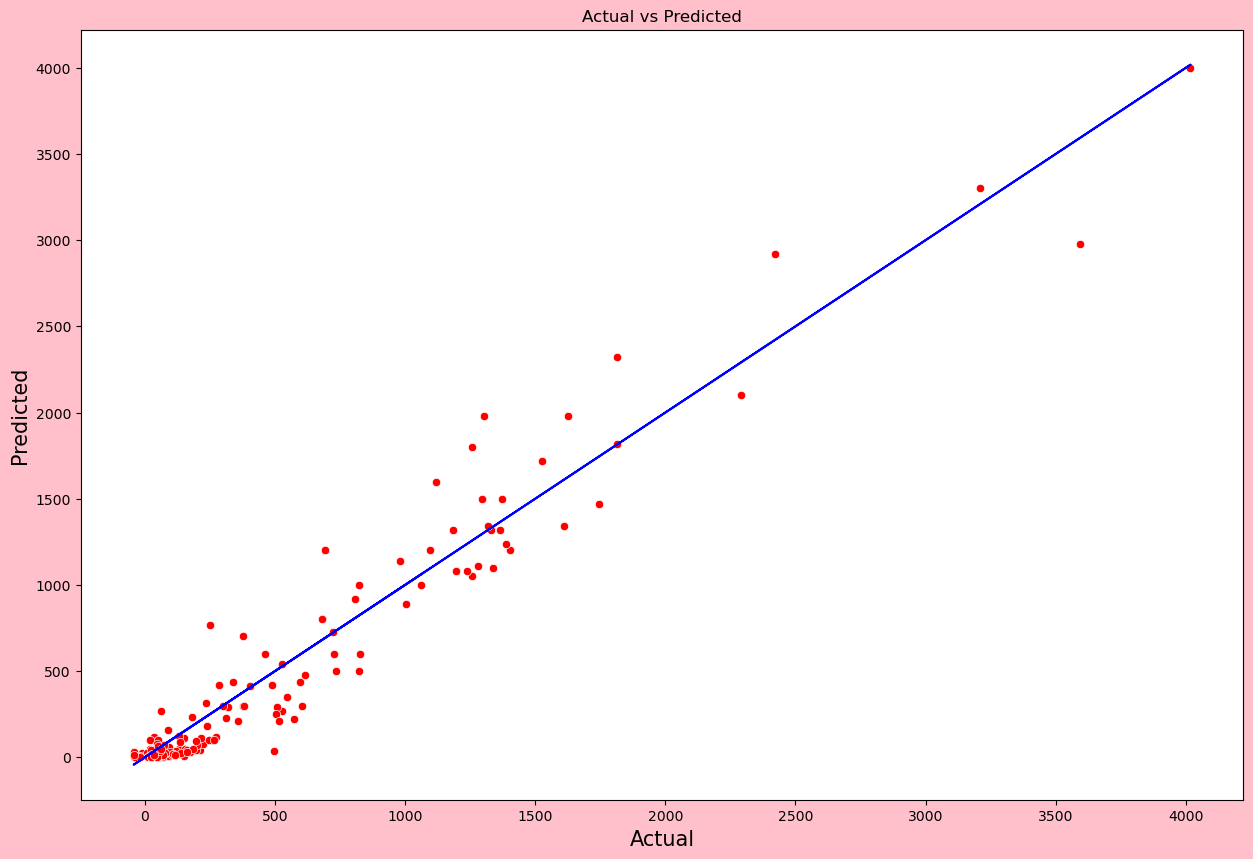

In [482]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='pink')
sns.scatterplot(x=LASSO_pred,y=y_test,color='r')
plt.plot(LASSO_pred,LASSO_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()

In [483]:
from sklearn.svm import SVR
SVM=SVR()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
SVM_pred_train=SVM.predict(x_train)
print('R2 score ',r2_score(y_test,SVM_pred))
print('R2 score on train data',r2_score(y_train,SVM_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,SVM_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,SVM_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,SVM_pred)))

R2 score  -0.1893158569947231
R2 score on train data -0.12223511439184698
Mean Squared error  553778.6618623519
Mean Absolute error  358.9791146121294
Root Mean squared error  744.1630613396179


In [484]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
RFR_pred_train=RFR.predict(x_train)
print('R2 score ',r2_score(y_test,RFR_pred))
print('R2 score on train data',r2_score(y_train,RFR_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,RFR_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,RFR_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,RFR_pred)))

R2 score  0.909190948479554
R2 score on train data 0.9771797523887585
Mean Squared error  42283.22925337497
Mean Absolute error  113.43074780219779
Root Mean squared error  205.62886288985544


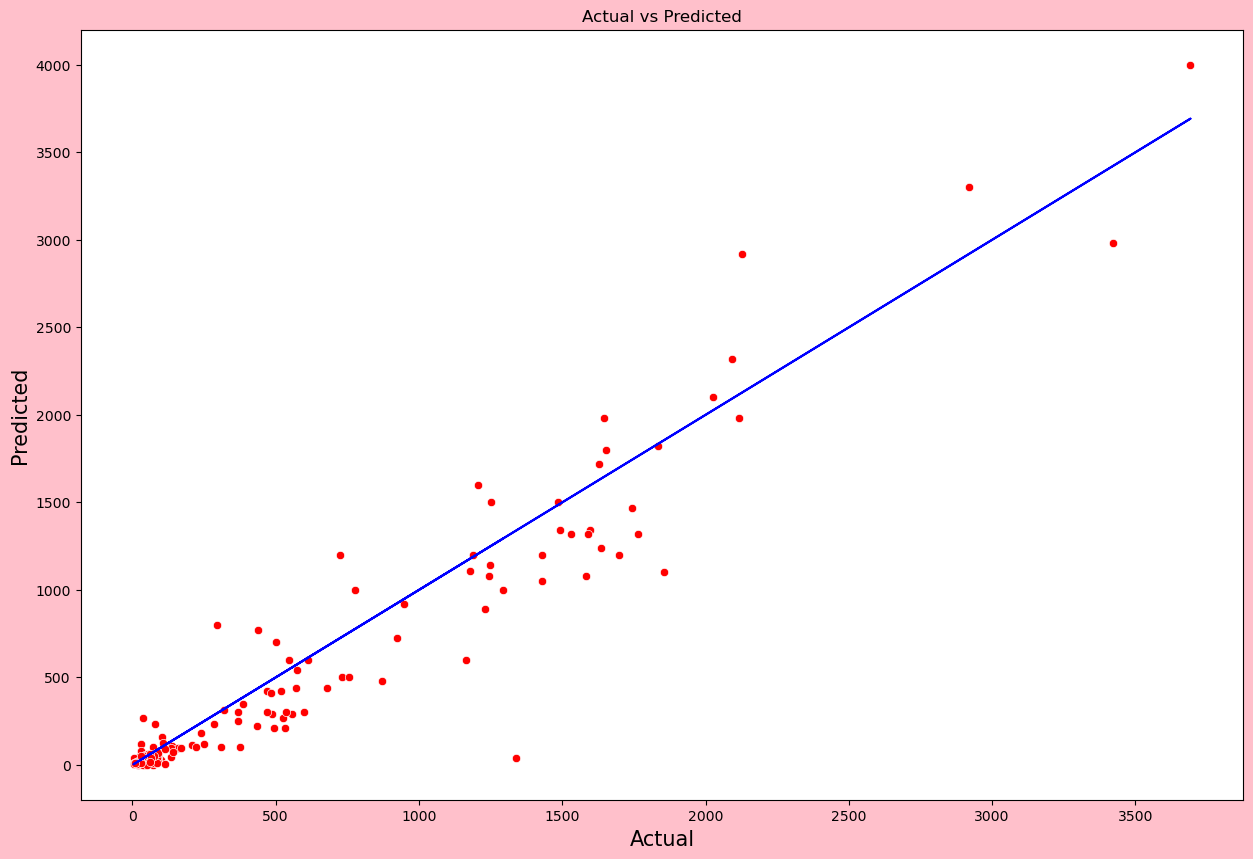

In [485]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='pink')
sns.scatterplot(x=RFR_pred,y=y_test,color='r')
plt.plot(RFR_pred,RFR_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()

In [486]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred=ETR.predict(x_test)
ETR_pred_train=ETR.predict(x_train)
print('R2 score ',r2_score(y_test,ETR_pred))
print('R2 score on train data',r2_score(y_train,ETR_pred_train))
print('Mean Squared error ',mean_squared_error(y_test,ETR_pred))
print('Mean Absolute error ',mean_absolute_error(y_test,ETR_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,ETR_pred)))

R2 score  0.9269545599063458
R2 score on train data 1.0
Mean Squared error  34011.995915387764
Mean Absolute error  108.6596829120879
Root Mean squared error  184.4234147698924


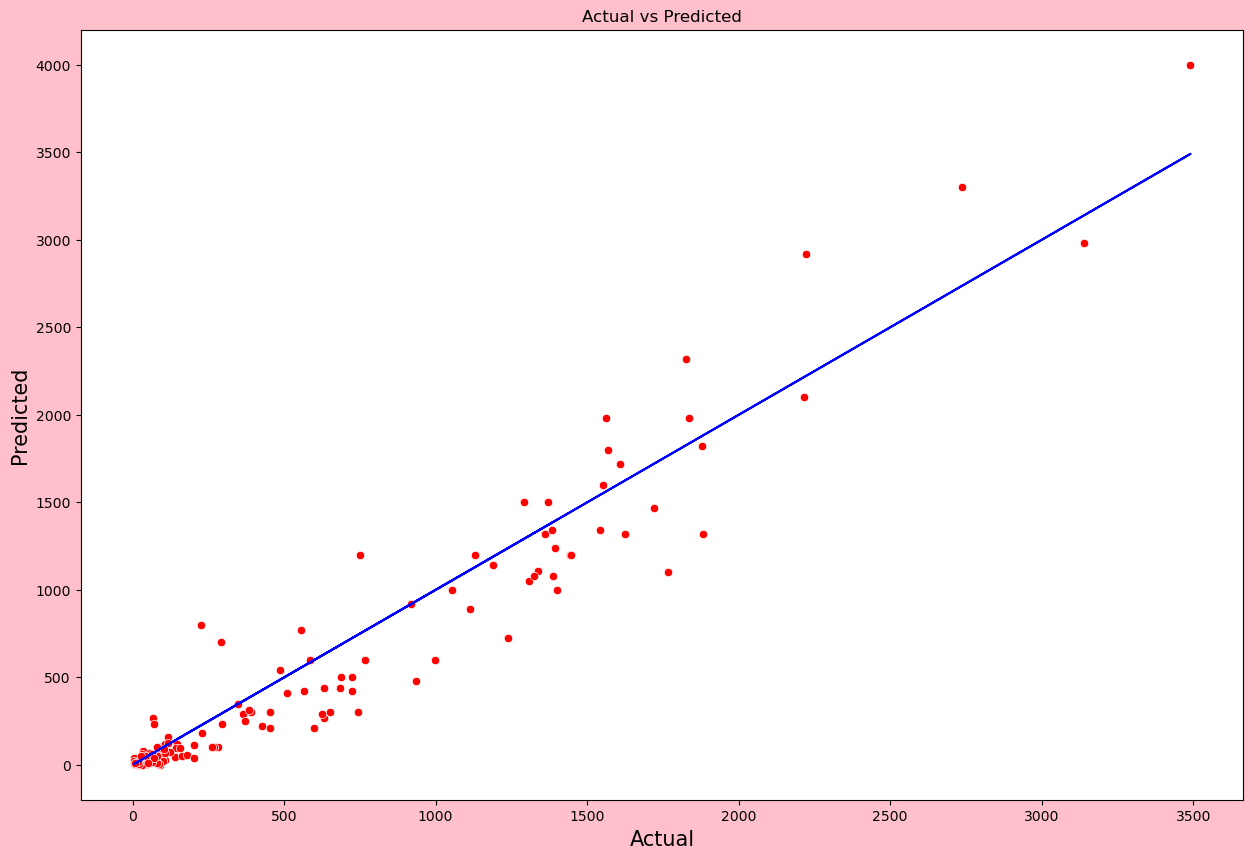

In [487]:
# visualise actual and predicted target variable
plt.figure(figsize=(15,10),facecolor='pink')
sns.scatterplot(x=ETR_pred,y=y_test,color='r')
plt.plot(ETR_pred,ETR_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual vs Predicted')
plt.show()

In [488]:
from sklearn.model_selection import cross_val_score

In [489]:
score=cross_val_score(LR,x,y)
print('R2 score ',r2_score(y_test,LR_pred))
print(score)
print(score.mean())
print('R2 score and cross validation score ',(r2_score(y_test,LR_pred)-score.mean()))

R2 score  0.9379193084964217
[0.83901614 0.82492256 0.82025557 0.8411441  0.85742852]
0.8365533796697973
R2 score and cross validation score  0.10136592882662443


In [490]:
score1=cross_val_score(GBR,x,y)
print('R2 score ',r2_score(y_test,GBR_pred))
print(score1)
print(score1.mean())
print('R2 score and cross validation score ',(r2_score(y_test,GBR_pred)-score1.mean()))

R2 score  0.8838322360739729
[0.82589859 0.83551103 0.81852799 0.81265672 0.86385413]
0.8312896915943234
R2 score and cross validation score  0.052542544479649456


In [491]:
score2=cross_val_score(DT,x,y)
print('R2 score ',r2_score(y_test,DT_pred))
print(score2)
print(score2.mean())
print('R2 score and cross validation score ',(r2_score(y_test,DT_pred)-score2.mean()))

R2 score  0.7777929779093837
[0.6658558  0.71714526 0.74007312 0.67858907 0.77336483]
0.7150056151065183
R2 score and cross validation score  0.06278736280286545


In [492]:
score3=cross_val_score(KNN,x,y)
print('R2 score ',r2_score(y_test,KNN_pred))
print(score3)
print(score3.mean())
print('R2 score and cross validation score ',(r2_score(y_test,KNN_pred)-score3.mean()))

R2 score  0.9151248761822942
[0.80591996 0.79968559 0.79217305 0.79242831 0.82832047]
0.8037054772914953
R2 score and cross validation score  0.11141939889079888


In [493]:
score4=cross_val_score(RIDGE,x,y)
print('R2 score ',r2_score(y_test,RIDGE_pred))
print(score4)
print(score4.mean())
print('R2 score and cross validation score ',(r2_score(y_test,RIDGE_pred)-score4.mean()))

R2 score  0.9376342620522707
[0.83989996 0.8249263  0.82004965 0.8418496  0.85746234]
0.836837570602745
R2 score and cross validation score  0.10079669144952574


In [494]:
score5=cross_val_score(LASSO,x,y)
print('R2 score ',r2_score(y_test,LASSO_pred))
print(score5)
print(score5.mean())
print('R2 score and cross validation score ',(r2_score(y_test,LASSO_pred)-score5.mean()))

R2 score  0.9381196651783332
[0.84320501 0.82741172 0.81926329 0.84775759 0.85757583]
0.8390426899114154
R2 score and cross validation score  0.09907697526691783


In [495]:
score6=cross_val_score(RFR,x,y)
print('R2 score ',r2_score(y_test,RFR_pred))
print(score6)
print(score6.mean())
print('R2 score and cross validation score ',(r2_score(y_test,RFR_pred)-score6.mean()))

R2 score  0.909190948479554
[0.84248079 0.83250949 0.82541876 0.82989584 0.87211805]
0.840484585045755
R2 score and cross validation score  0.06870636343379899


In [496]:
score7=cross_val_score(ETR,x,y)
print('R2 score ',r2_score(y_test,ETR_pred))
print(score7)
print(score7.mean())
print('R2 score and cross validation score ',(r2_score(y_test,ETR_pred)-score7.mean()))

R2 score  0.9269545599063458
[0.87149942 0.83281622 0.83618111 0.86452617 0.88501501]
0.8580075854760919
R2 score and cross validation score  0.06894697443025388


In [ ]:
# FROM THE DEFERENCE OF r2 SCORE AND CROSS VALIDATION SCORE WE CAN SEE THAT gRADIENT bOOSTING rEGRESSOR IS THE BEST PERFORMING MODEL 

In [497]:
from sklearn.model_selection import GridSearchCV

In [503]:
grid_param={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,0.2],'max_depth':[None,10,15],'min_samples_leaf':[1,2,4],'min_samples_split':[2,5,10],'max_features':['auto','sqrt','log2']}

In [504]:
gscv=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=grid_param,cv=5,verbose=2,scoring='neg_mean_squared_error',n_jobs=-1)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [505]:
best_parameters=gscv.best_params_
print(best_parameters)

{'learning_rate': 0.1, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [506]:
gbr=GradientBoostingRegressor(learning_rate=0.1,max_depth=15,max_features='log2',min_samples_leaf=1,min_samples_split=10,n_estimators=100)

In [508]:
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('R2 score ',r2_score(y_test,pred))
print('Mean Squared error ',mean_squared_error(y_test,pred))
print('Mean Absolute error ',mean_absolute_error(y_test,pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score  0.9143702249554628
Mean Squared error  39871.613550636815
Mean Absolute error  110.67535086056417
Root Mean squared error  199.67877591430897


In [ ]:
# before hyper parameter tuning r2 score 88 and cross val score  83 .after hyper parametr tuning r2 score is 91.43